In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({"font.size" : 10, 
                     "font.family" : 'NanumGothic',
                     "axes.unicode_minus" : False})
plt.rc("font", family = 'NanumGothic')
import seaborn as sns
from pathlib import Path

In [82]:
DATA = Path("../../data")

In [83]:
train = pd.read_csv(DATA / "train_final_preprocess.csv")
test = pd.read_csv(DATA / "test_final_preprocess.csv")

In [84]:
train = train.sort_values(by=["stn_id", "DateTime"]).reset_index(drop=True)

In [85]:
train

,class,day,hm,minute,month,re,stn_id,sun10,ta,time,...,cos_time,sin_month,cos_month,alpha,dew_point,diff_air-dew,diff_ts-dew,fog_risk,sin_deg,cos_deg
0,4,1,38.9,10,1,0,AA,0.0,-6.4,0,...,1.000000,5.000000e-01,0.866025,-1.422032,-18.083476,11.683476,15.283476,0,0.000000,1.000000
1,4,1,37.9,20,1,0,AA,0.0,-6.3,0,...,1.000000,5.000000e-01,0.866025,-1.440405,-18.299136,11.999136,15.599136,0,0.000000,1.000000
2,4,1,40.0,30,1,0,AA,0.0,-6.3,0,...,1.000000,5.000000e-01,0.866025,-1.386477,-17.664937,11.364937,15.064937,0,0.000000,1.000000
3,4,1,39.5,40,1,0,AA,0.0,-6.2,0,...,1.000000,5.000000e-01,0.866025,-1.391392,-17.722897,11.522897,15.122897,0,0.466387,0.884581
4,4,1,39.8,50,1,0,AA,0.0,-6.1,0,...,1.000000,5.000000e-01,0.866025,-1.376169,-17.543307,11.443307,15.043307,0,0.863396,0.504528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,4,31,50.2,10,12,0,EC,0.0,2.5,23,...,0.965926,-2.449294e-16,1.000000,-0.509409,-6.810493,9.310493,5.910493,0,-0.816138,0.577858
3156456,4,31,50.1,20,12,0,EC,0.0,2.3,23,...,0.965926,-2.449294e-16,1.000000,-0.525645,-7.021146,9.321146,5.721146,0,-0.914960,0.403545
3156457,4,31,51.0,30,12,0,EC,0.0,2.2,23,...,0.965926,-2.449294e-16,1.000000,-0.514970,-6.882689,9.082689,5.482689,0,-0.997314,0.073238
3156458,4,31,51.7,40,12,0,EC,0.0,2.1,23,...,0.965926,-2.449294e-16,1.000000,-0.508474,-6.798347,8.898347,5.198347,0,-0.999986,0.005236


In [86]:
test

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,...,cos_time,sin_month,cos_month,alpha,dew_point,diff_air-dew,diff_ts-dew,fog_risk,sin_deg,cos_deg
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.317099,-4.285774,1.785774,2.685774,0,-0.507538,0.861629
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.309130,-4.179973,1.679973,2.579973,0,-0.618408,0.785857
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0,...,1.000000,5.000000e-01,0.866025,-0.304606,-4.119849,1.619849,2.419849,0,0.006981,0.999976
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0,...,1.000000,5.000000e-01,0.866025,-0.310901,-4.203496,1.603496,2.603496,0,-0.593419,0.804894
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0,...,1.000000,5.000000e-01,0.866025,-0.307525,-4.158644,1.558644,2.558644,0,-0.475624,-0.879649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0,...,0.965926,-2.449294e-16,1.000000,-0.017403,-0.239285,4.739285,2.139285,0,-0.361625,0.932324
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0,...,0.965926,-2.449294e-16,1.000000,-0.009006,-0.123892,4.723892,2.023892,0,-0.419452,0.907777
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0,...,0.965926,-2.449294e-16,1.000000,-0.006245,-0.085923,4.585923,1.885923,0,-0.389124,0.921185
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0,...,0.965926,-2.449294e-16,1.000000,-0.014720,-0.202430,4.502430,1.602430,0,-0.615661,0.788011


In [87]:
train_use_label_x = ["year", 'hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg','ground', 're', 'fog_risk', 'vis1']
test_use_label_x = ['hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew', 
                     'sin_time', 'cos_time', 'sin_month', 'cos_month', 'sin_deg', 'cos_deg','ground', 're', 'fog_risk']

In [88]:
train_df = train.loc[:, train_use_label_x]
test_df = test.loc[:, test_use_label_x]

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim

In [90]:
# min-max scaler

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_cols = ['hm', 'sun10', 'ta', 'ts', 'ws10_ms', 'dew_point', 'diff_air-dew', 'diff_ts-dew']
y_col = "vis1"

train_df.loc[:, X_cols] = X_scaler.fit_transform(train_df[X_cols])
train_df.loc[:, y_col] = y_scaler.fit_transform(train_df[y_col].to_frame())
test_df.loc[:, X_cols] = X_scaler.transform(test_df[X_cols])

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["ground"] = label_encoder.fit_transform(train_df["ground"])
test_df["ground"] = label_encoder.transform(test["ground"])

In [52]:
train_df

,year,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,vis1
0,I,0.373975,0.0,0.288245,0.028000,0.000000,0.270102,0.259989,0.460359,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
1,I,0.363730,0.0,0.289855,0.029333,0.000000,0.266963,0.267013,0.463774,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
2,I,0.385246,0.0,0.289855,0.030667,0.000000,0.276195,0.252901,0.457995,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
3,I,0.380123,0.0,0.291465,0.030667,0.017778,0.275351,0.256416,0.458622,0.000000,1.000000,5.000000e-01,0.866025,0.466387,0.884581,0,0,0,0.330353
4,I,0.383197,0.0,0.293076,0.032000,0.022222,0.277965,0.254645,0.457761,0.000000,1.000000,5.000000e-01,0.866025,0.863396,0.504528,0,0,0,0.330353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,K,0.489754,0.0,0.431562,0.053333,0.342222,0.434202,0.207184,0.358962,-0.258819,0.965926,-2.449294e-16,1.000000,-0.816138,0.577858,4,0,0,0.330353
3156456,K,0.488730,0.0,0.428341,0.048000,0.253333,0.431136,0.207421,0.356913,-0.258819,0.965926,-2.449294e-16,1.000000,-0.914960,0.403545,4,0,0,0.330353
3156457,K,0.497951,0.0,0.426731,0.046667,0.217778,0.433151,0.202115,0.354334,-0.258819,0.965926,-2.449294e-16,1.000000,-0.997314,0.073238,4,0,0,0.330353
3156458,K,0.505123,0.0,0.425121,0.044000,0.204444,0.434379,0.198012,0.351258,-0.258819,0.965926,-2.449294e-16,1.000000,-0.999986,0.005236,4,0,0,0.330353


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156460 entries, 0 to 3156459
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   year          object 
 1   hm            float64
 2   sun10         float64
 3   ta            float64
 4   ts            float64
 5   ws10_ms       float64
 6   dew_point     float64
 7   diff_air-dew  float64
 8   diff_ts-dew   float64
 9   sin_time      float64
 10  cos_time      float64
 11  sin_month     float64
 12  cos_month     float64
 13  sin_deg       float64
 14  cos_deg       float64
 15  ground        int64  
 16  re            int64  
 17  fog_risk      int64  
 18  vis1          float64
dtypes: float64(15), int64(3), object(1)
memory usage: 457.6+ MB


In [54]:
test_df

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk
0,0.871926,0.0,0.351047,0.044000,0.026667,0.470954,0.039738,0.324076,0.000000,1.000000,5.000000e-01,0.866025,-0.507538,0.861629,0,0,0
1,0.879098,0.0,0.351047,0.044000,0.053333,0.472495,0.037384,0.322932,0.000000,1.000000,5.000000e-01,0.866025,-0.618408,0.785857,0,0,0
2,0.883197,0.0,0.351047,0.042667,0.017778,0.473370,0.036046,0.321200,0.000000,1.000000,5.000000e-01,0.866025,0.006981,0.999976,0,0,0
3,0.884221,0.0,0.349436,0.044000,0.031111,0.472152,0.035682,0.323186,0.000000,1.000000,5.000000e-01,0.866025,-0.593419,0.804894,0,0,0
4,0.887295,0.0,0.349436,0.044000,0.008889,0.472805,0.034684,0.322701,0.000000,1.000000,5.000000e-01,0.866025,-0.475624,-0.879649,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,0.705943,0.0,0.463768,0.090667,0.271111,0.529859,0.105462,0.318164,-0.258819,0.965926,-2.449294e-16,1.000000,-0.361625,0.932324,4,0,0
262796,0.706967,0.0,0.465378,0.090667,0.257778,0.531539,0.105119,0.316916,-0.258819,0.965926,-2.449294e-16,1.000000,-0.419452,0.907777,4,0,0
262797,0.714139,0.0,0.463768,0.089333,0.235556,0.532091,0.102049,0.315424,-0.258819,0.965926,-2.449294e-16,1.000000,-0.389124,0.921185,4,0,0
262798,0.718238,0.0,0.460548,0.084000,0.164444,0.530396,0.100191,0.312357,-0.258819,0.965926,-2.449294e-16,1.000000,-0.615661,0.788011,4,0,0


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hm            262800 non-null  float64
 1   sun10         262800 non-null  float64
 2   ta            262800 non-null  float64
 3   ts            262800 non-null  float64
 4   ws10_ms       262800 non-null  float64
 5   dew_point     262800 non-null  float64
 6   diff_air-dew  262800 non-null  float64
 7   diff_ts-dew   262800 non-null  float64
 8   sin_time      262800 non-null  float64
 9   cos_time      262800 non-null  float64
 10  sin_month     262800 non-null  float64
 11  cos_month     262800 non-null  float64
 12  sin_deg       262800 non-null  float64
 13  cos_deg       262800 non-null  float64
 14  ground        262800 non-null  int64  
 15  re            262800 non-null  int64  
 16  fog_risk      262800 non-null  int64  
dtypes: float64(14), int64(3)
memory usage: 34.1 MB


In [56]:
# Holdout (I,J : K)

train_data = train_df.query("year!='K'").iloc[:, 1:]
valid_data = train_df.query("year=='K'").iloc[:, 1:]

In [57]:
train_data

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,vis1
0,0.373975,0.0,0.288245,0.028000,0.000000,0.270102,0.259989,0.460359,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
1,0.363730,0.0,0.289855,0.029333,0.000000,0.266963,0.267013,0.463774,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
2,0.385246,0.0,0.289855,0.030667,0.000000,0.276195,0.252901,0.457995,0.000000,1.000000,5.000000e-01,0.866025,0.000000,1.000000,0,0,0,0.330353
3,0.380123,0.0,0.291465,0.030667,0.017778,0.275351,0.256416,0.458622,0.000000,1.000000,5.000000e-01,0.866025,0.466387,0.884581,0,0,0,0.330353
4,0.383197,0.0,0.293076,0.032000,0.022222,0.277965,0.254645,0.457761,0.000000,1.000000,5.000000e-01,0.866025,0.863396,0.504528,0,0,0,0.330353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103895,0.461066,0.0,0.354267,0.026667,0.315556,0.359187,0.215044,0.393073,-0.258819,0.965926,-2.449294e-16,1.000000,-0.733730,0.679441,4,0,0,0.330353
3103896,0.449795,0.0,0.354267,0.025333,0.320000,0.354950,0.221521,0.395141,-0.258819,0.965926,-2.449294e-16,1.000000,-0.703395,0.710799,4,0,0,0.330353
3103897,0.441598,0.0,0.354267,0.026667,0.320000,0.351811,0.226319,0.398555,-0.258819,0.965926,-2.449294e-16,1.000000,-0.699663,0.714473,4,0,0,0.330353
3103898,0.432377,0.0,0.354267,0.025333,0.320000,0.348221,0.231807,0.400141,-0.258819,0.965926,-2.449294e-16,1.000000,-0.739631,0.673013,4,0,0,0.330353


In [58]:
valid_data

,hm,sun10,ta,ts,ws10_ms,dew_point,diff_air-dew,diff_ts-dew,sin_time,cos_time,sin_month,cos_month,sin_deg,cos_deg,ground,re,fog_risk,vis1
105263,0.396516,0.0,0.254428,0.114400,0.084444,0.251805,0.241229,0.544058,0.000000,1.000000,5.000000e-01,0.866025,-0.675590,0.737277,0,0,0,0.330353
105264,0.393443,0.0,0.252818,0.078133,0.084444,0.249246,0.242915,0.516534,0.000000,1.000000,5.000000e-01,0.866025,-0.825113,0.564967,0,0,0,0.330353
105265,0.393443,0.0,0.251208,0.083467,0.097778,0.247926,0.242708,0.521843,0.000000,1.000000,5.000000e-01,0.866025,-0.998441,0.055822,0,0,0,0.330353
105266,0.400615,0.0,0.247987,0.117867,0.093333,0.248152,0.237911,0.549585,0.000000,1.000000,5.000000e-01,0.866025,-0.992115,-0.125333,0,0,0,0.330353
105267,0.398566,0.0,0.246377,0.124533,0.102222,0.246015,0.238953,0.556582,0.000000,1.000000,5.000000e-01,0.866025,-0.975917,-0.218143,0,0,0,0.330353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,0.489754,0.0,0.431562,0.053333,0.342222,0.434202,0.207184,0.358962,-0.258819,0.965926,-2.449294e-16,1.000000,-0.816138,0.577858,4,0,0,0.330353
3156456,0.488730,0.0,0.428341,0.048000,0.253333,0.431136,0.207421,0.356913,-0.258819,0.965926,-2.449294e-16,1.000000,-0.914960,0.403545,4,0,0,0.330353
3156457,0.497951,0.0,0.426731,0.046667,0.217778,0.433151,0.202115,0.354334,-0.258819,0.965926,-2.449294e-16,1.000000,-0.997314,0.073238,4,0,0,0.330353
3156458,0.505123,0.0,0.425121,0.044000,0.204444,0.434379,0.198012,0.351258,-0.258819,0.965926,-2.449294e-16,1.000000,-0.999986,0.005236,4,0,0,0.330353


In [59]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"{device} is available")

cpu is available


In [60]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, window_size=6, kind: str = None):
        self.data = np.array(data)
        self.window_size = window_size
        self.kind = kind
        
    def __len__(self):
        return len(self.data) - self.window_size # 2105254
    
    def __getitem__(self, idx):
        if self.kind == 'test':
            X_data = self.data[idx:idx+self.window_size, :]
            return torch.tensor(data=X_data, dtype=torch.float32)
        else:
            X_data = self.data[idx:idx+self.window_size, :-1]
            y_data = np.expand_dims(self.data[idx+self.window_size, -1], axis=-1)
            return torch.tensor(data=X_data, dtype=torch.float32), torch.tensor(data=y_data, dtype=torch.float32)

In [61]:
batch_size = 6 * 24 # 배치 사이즈는 하루 단위로 설정
window_size = 6 # 60분을 보고 다음 10분을 예측하므로 총 window_size는 6

In [62]:
pre_val_data = valid_data.iloc[:window_size, :].reset_index(drop=True)
valid_data = pd.concat([pre_val_data, valid_data.reset_index(drop=True)], axis=0).reset_index(drop=True)

In [63]:
train_dataset = CustomDataset(data=train_data, window_size=window_size) # window_size는 default 6 (1시간 단위)
valid_dataset = CustomDataset(data=valid_data, window_size=window_size)

In [64]:
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) # 시계열 데이터라서 shuffle은 함부로 하면 안됨
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False) # 시계열 데이터라서 shuffle은 함부로 하면 안됨

In [65]:
for X, y in train_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 17]) torch.Size([144, 1])


In [66]:
for X, y in valid_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 17]) torch.Size([144, 1])


In [74]:
# 모델링 파라미터 정의

input_size = len(train_data.columns) - 1 # 입력 특성 개수(target columns 만큼 특성이 들어감)
num_layers = 2 # Hidden Layer의 개수 간단하게 two-layer로 구현 (추후 더 복잡하게 변경할 수 있음)
hidden_size = 64 # Hidden Layer의 크기 train 데이터의 개수가 대략 2백만개 정도이므로 512 정도로 세팅 (크면 모델의 표현력이 상승하지만 과적합의 위험이 존재함 -> 모델의 복잡성과 데이터의 복잡성을 고려해야함 = 실험적으로 찾아야함)
output_size = 6 # output은 10분 단위로 1시간동안 6개의 데이터를 보고 6개의 예측을 뽑아낸 다음 fully connect를 진행함

In [75]:
# 모델링
from torch.autograd import Variable

"""LSTM"""

class VanillaLSTM(nn.Module):
    def __init__(self, input_size, num_layers, hidden_size, window_size, device):
        super(VanillaLSTM, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.window_size = window_size
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            dropout=0.5,
                            batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size * window_size, 256),
                                nn.ReLU(),
                                nn.Linear(256, 144),
                                nn.ReLU(),
                                nn.Linear(144, 1),
                                nn.ReLU())
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        
        # initalization
        h0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        c0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        
        out, _ = self.lstm(x, (h0, c0))
        
        out = out.contiguous().view(-1, self.hidden_size) # [batch_size*sequence_length, hidden_size]
        out = self.batch_norm(out) # 배치 정규화
        out = out.view(-1, self.window_size, self.hidden_size) # [batch_size, sequence_length, hidden_size]
        
        out = out.reshape(out.shape[0], -1)
        
        out = self.fc(out)
        
        return out

In [76]:
model = VanillaLSTM(input_size=input_size,
                   hidden_size=hidden_size,
                   window_size=window_size,
                   num_layers=num_layers,
                   device=device).to(device=device)

In [77]:
# RMSLELoss 구현 RMSLE는 outlier에 강건하며 상대적오차를 측정함 또한 예측값이 클 때보다 작을 때 더 큰 패널티 부여함

class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
    
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [78]:
# 학습 파라미터 정의

criterion = nn.MSELoss()
learning_rate = 0.001 # 학습률은 0.001로 설정
epoch = 5 # 학습 반복 횟수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode="min", patience=1) # 1에폭마다 Loss가 줄어들지 않으면 학습률을 감소시킴

In [79]:
# # 기울기 클리핑 함수 : 기울기 소실, 폭발 문제를 해결하기 위해 기울기가 일정 값 범위에서 유지되도록 함 value clipping 과 norm clipping 두 가지 방법이 있음
# def clip_gradient(model, clip_value):
#     for param in model.parameters():
#         param.grad.data.clamp_(-clip_value, clip_value)

In [80]:
# 학습
from tqdm.auto import tqdm
import torch.nn.utils as utils

loss_list = []
n = len(train_data_loader)

for e in tqdm(range(1, epoch+1)):
    running_loss = 0.0
    train_iterator = tqdm(enumerate(train_data_loader), total=n, desc=f"training epoch {e}")
    
    for _, batch_data in train_iterator:
        X, y = batch_data # 배치데이터
        out = model(X) # 학습 데이터를 모델에 넣기
        loss = criterion(out, y) # output과 y 데이터로 loss 구하기
        
        optimizer.zero_grad() # 기울기 초기화
        loss.backward() # 역전파 수행 -> loss function의 기울기 계산
        
        # clip_gradient(model, 1.0) # 기울기 클리핑(value)
        # utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # 기울기 클리핑(norm)
        
        optimizer.step() # 기울기를 이용해 가중치 업데이트
        running_loss += loss.item() # 한 배치의 loss 더하기 (추후 평균 loss를 구하기 위함)
        train_iterator.set_postfix({
            'train_loss' : format(loss, 'f')
        })
    
    loss_list.append(running_loss / n) # 한 epoch의 평균 loss
    # scheduler.step(metrics=loss) # 스케줄러 업데이트

  0%|          | 0/5 [00:00<?, ?it/s]

training epoch 1:   0%|          | 0/14620 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [40]:
loss_list

[0.017459532199135354,
 0.016591921496747066,
 0.01654194404367191,
 0.016409902694340044,
 0.016280298982328856]

<Axes: >

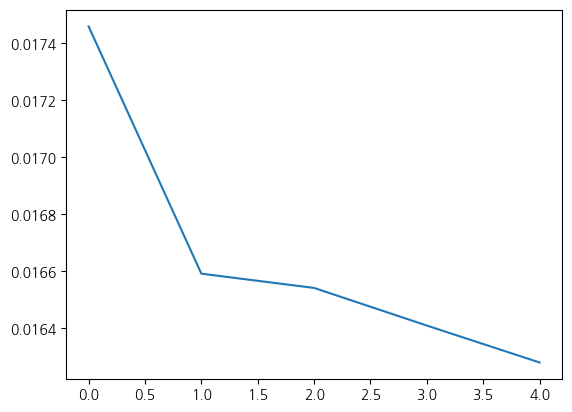

In [41]:
sns.lineplot(loss_list)

In [42]:
torch.save(model, "VanillaLSTM.pt")

In [203]:
# 커널 재실행 시 모델 불러오기
import torch

model = torch.load("VanillaLSTM.pt")


In [44]:
# Validation 검증
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    valid = []
    running_loss = 0.0
    n = len(valid_data_loader)
    valid_iterator = tqdm(enumerate(valid_data_loader), total=n, desc=f"validation")
    for _, batch_data in valid_iterator:
        X, y = batch_data
        valid_pred = model(X)
        valid += np.array(valid_pred).flatten().tolist()
    # inverse
    pred_inverse = y_scaler.inverse_transform(np.array(valid).reshape(-1, 1)).squeeze()
    y_valid = train.query("년도=='K'")["10분평균시정"].reset_index(drop=True)
    
    valid_df = pd.DataFrame({"actual" : y_valid,
                             "pred" : pred_inverse})
    
    # loss
    valid_df["loss"] = valid_df.apply(lambda x: round(float(criterion(torch.tensor(x.iloc[1], dtype=torch.float32), torch.tensor(x.iloc[0], dtype=torch.float32))), 2), axis=1)

validation:   0%|          | 0/7300 [00:00<?, ?it/s]

In [45]:
valid_df

,actual,pred,loss
0,20000.0,20061.644651,3800.05
1,20000.0,20073.589122,5415.47
2,20000.0,20121.170395,14682.15
3,20000.0,20212.673121,45230.16
4,20000.0,20235.160544,55300.30
...,...,...,...
1051195,20000.0,18361.763578,2683818.25
1051196,20000.0,18360.244815,2688799.25
1051197,20000.0,18341.137631,2751827.50
1051198,20000.0,18299.820801,2890611.00


In [73]:
# 음수로 예측된 값 절대값 취함

valid_df["pred"] = valid_df["pred"].abs()

In [47]:
def make_class(vis):
    if 0 < vis and vis < 200 :
        return 1
    elif 200 <= vis and vis < 500 :
        return 2
    elif 500 <= vis and vis < 1000 :
        return 3
    elif 1000 <= vis :
        return 4
    else :
        return np.nan

In [48]:
valid_df["actual_target"] = valid_df["actual"].apply(make_class)
valid_df["pred_target"] = valid_df["pred"].apply(make_class)

In [76]:
valid_df.query("pred < 0")

,actual,pred,loss,actual_target,pred_target


In [49]:
valid_df.query("actual_target == 4").value_counts(subset="pred_target")

pred_target
4    1037547
1       4669
3        541
2        315
Name: count, dtype: int64

In [50]:
valid_df.isna().sum()

actual           0
pred             0
loss             0
actual_target    0
pred_target      0
dtype: int64

In [51]:
valid_df.value_counts(subset="actual_target")

actual_target
4    1043072
2       3215
3       2996
1       1917
Name: count, dtype: int64

In [52]:
def csi_score_class(pred, actual):
    matrix = {i:{j:0 for j in range(1, 4+1)}for i in range(1, 4+1)}
    df_matrix = pd.DataFrame(matrix)
    # 길이가 같지 않으면 추론이 제대로 되지 않은 것이므로 에러 발생
    if len(pred) != len(actual):
        raise
    
    # 리스트로 들어온 pred와 actual을 순회하며 해당 class의 개수를 샘
    # 행이 pred, 열이 actual
    for i in range(len(pred)):
        df_matrix[pred[i]][actual[i]] += 1
    
    # H, F, M 배분
    H = df_matrix[1][1] + df_matrix[2][2] + df_matrix[3][3]
    F = sum(df_matrix.iloc[:, :3]) - H
    M = sum(df_matrix.iloc[:3, -1])
    
    return H / (H + F + M), df_matrix, (H, F, M)

In [53]:
score, csi_df, _ = csi_score_class(valid_df["pred_target"], valid_df["actual_target"])

In [54]:
score

0.015197170182104022

In [55]:
# 행 index가 정답, 열 index가 예측
csi_df

,1,2,3,4
1,74,6,7,1830
2,180,12,32,2991
3,144,16,30,2806
4,4669,315,541,1037547


<Axes: ylabel='loss'>

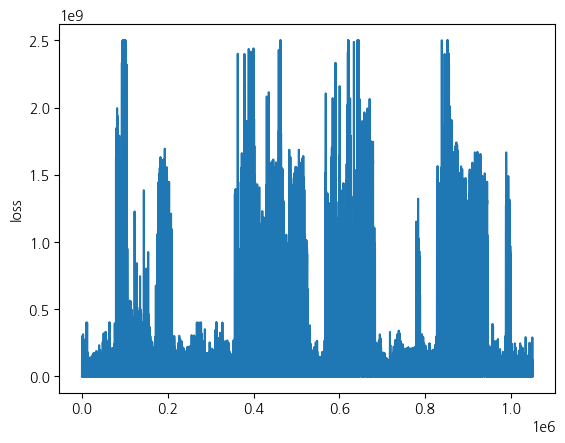

In [56]:
sns.lineplot(valid_df["loss"].astype(float))

In [204]:
# test 셋 forecasting

## window 만큼 imputate로 채우기

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)
impute_train = train_df.iloc[:, 1:-1]
imputer.fit(impute_train)

KNNImputer(n_neighbors=6)

In [205]:
target_data = test_df.shift(window_size)[:144]
cols = target_data.columns

In [206]:
pre_test_data = pd.DataFrame(imputer.transform(target_data), columns=cols)[:6]

In [207]:
def is_rain(rain):
    if rain >= 0.5 :
        return 1
    elif rain < 0.5:
        return 0
    else:
        return np.nan

In [208]:
pre_test_data["강수유무"] = pre_test_data["강수유무"].apply(is_rain)

In [209]:
pre_test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
5,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0


In [210]:
test_data = pd.concat([pre_test_data, test_df], axis=0)

In [211]:
test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
...,...,...,...,...,...,...,...
262795,0.941111,0.271111,0.463768,0.713000,0.000000,0.090667,0
262796,0.931111,0.257778,0.465378,0.714000,0.000000,0.090667,0
262797,0.936389,0.235556,0.463768,0.721000,0.000000,0.089333,0
262798,0.894444,0.164444,0.460548,0.725000,0.000000,0.084000,0


In [231]:
test_dataset = CustomDataset(data=test_data, window_size=6, kind='test')
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [232]:
for X in test_data_loader:
    print(X)
    break

tensor([[[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.9153, 0.0267, 0.3510,  ..., 0.0000, 0.0440, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0

In [233]:
# test forecast
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    n = len(test_data_loader)
    test_list = []
    test_iterator = tqdm(enumerate(test_data_loader), total=n, desc=f"Test")
    for _, X in test_iterator:
        test_pred = model(X)
        test_list += np.array(test_pred).flatten().tolist()
    # inverse
    pred_inverse = y_scaler.inverse_transform(np.array(test_list).reshape(-1, 1)).squeeze()
    
    test_pred_df = pd.DataFrame({"pred" : pred_inverse})

Test:   0%|          | 0/1825 [00:00<?, ?it/s]

In [234]:
test_pred_df.isna().sum()

pred    0
dtype: int64

In [235]:
test_pred_df.describe()

,pred
count,262800.000000
mean,15192.797320
std,3712.470791
min,1.000000
25%,13361.749454
50%,15625.940477
75%,18065.948535
max,23079.820463


In [236]:
test_pred_df

,pred
0,16982.521736
1,16289.599942
2,15359.792707
3,14549.874805
4,14054.095399
...,...
262795,17125.795860
262796,17186.622111
262797,17105.705628
262798,17024.614180


In [237]:
test

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4.0,A,-0.317099,-4.285774
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4.0,A,-0.309130,-4.179973
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4.0,A,-0.304606,-4.119849
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4.0,A,-0.310901,-4.203496
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4.0,A,-0.307525,-4.158644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,NaN,E,-0.017403,-0.239285
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,NaN,E,-0.009006,-0.123892
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,NaN,E,-0.006245,-0.085923
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,NaN,E,-0.014720,-0.202430


In [238]:
def make_class(vis):
    if 0 <= vis and vis < 200 :
        return 1
    elif 200 <= vis and vis < 500 :
        return 2
    elif 500 <= vis and vis < 1000 :
        return 3
    elif 1000 <= vis :
        return 4
    else :
        return np.nan

In [239]:
test["시정구간"] = test_pred_df["pred"].apply(make_class)

In [240]:
test[test["시정구간"].isna()]

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point


In [242]:
test["시정구간"].value_counts()

시정구간
4    260225
1      2222
3       228
2       125
Name: count, dtype: int64

In [243]:
original_test = pd.read_csv(DATA / "fog_test.csv")

In [244]:
original_test
del original_test["Unnamed: 0"]

In [245]:
original_test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9,NaN
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9,NaN
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8,NaN
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4,NaN


In [250]:
test = test.iloc[:, :-3]

In [251]:
test.columns = original_test.columns

In [252]:
test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,4
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,4
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,4
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,4


In [253]:
test.to_csv("240253.csv", index=False)